In [1]:
import numpy as np

def gauss_seidel(A, b, x0, tol, K): 
    x_iter = []
    n = A.shape[0]
    err = tol + 1
    x = x0.copy()
    k = 0
    
    while err > tol and k < K:
        xold = x.copy()
        x = gauss_iter(A, b, x)
        print(x)
        x_iter.append(x.copy())
        err = np.linalg.norm(x-xold, np.inf)/np.linalg.norm(x, np.inf)
        k = k+1
    return x, x_iter

def gauss_iter(A, b, x):
    n = A.shape[0]
    for i in range(n):
        s = 0
        for j in range(n):
            if j!=i:
                s += A[i,j]*x[j]
        x[i] = (-s +b[i])/A[i,i]
    return x

In [6]:
A = np. array([[2., 1., 0., 0.],
               [2., 3.,  0., 1.],
               [0., -1., -6., 2.],
               [0., 2., 1., -4.]])

b = np. array([1., 0., -2., -5 ]) 

tol = 0.0001
K = 1000
x0 = np.zeros(4)
x, x_iter = gauss_seidel(A,b, x0, tol, K)
print(x)
print(x_iter)

[ 0.5        -0.33333333  0.38888889  1.18055556]
[ 0.66666667 -0.83796296  0.86651235  1.0476466 ]
[ 0.91898148 -0.96186986  0.84286051  0.9797802 ]
[ 0.98093493 -0.98055002  0.82335174  0.96556292]
[ 0.99027501 -0.98203765  0.81886058  0.96369632]
[ 0.99101882 -0.98191132  0.81821733  0.96359867]
[ 0.99095566 -0.98183666  0.81817233  0.96362475]
[ 0.99095566 -0.98183666  0.81817233  0.96362475]
[array([ 0.5       , -0.33333333,  0.38888889,  1.18055556]), array([ 0.66666667, -0.83796296,  0.86651235,  1.0476466 ]), array([ 0.91898148, -0.96186986,  0.84286051,  0.9797802 ]), array([ 0.98093493, -0.98055002,  0.82335174,  0.96556292]), array([ 0.99027501, -0.98203765,  0.81886058,  0.96369632]), array([ 0.99101882, -0.98191132,  0.81821733,  0.96359867]), array([ 0.99095566, -0.98183666,  0.81817233,  0.96362475])]


In [3]:
def error(x_iter):
    errors = []
    for i in range(len(x_iter)):
        err = np.linalg.norm(A@x_iter[i] - b)
        errors.append(err)
    return errors

In [4]:
err = error(x_iter)

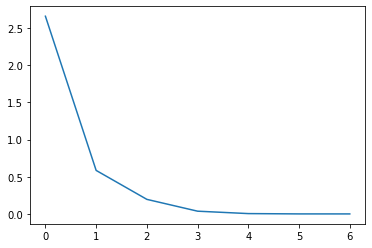

In [5]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(x_iter))],err)